In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
data_file = 'data/Occupancy_Estimation.csv'

In [80]:
df = pd.read_csv(data_file)

In [81]:
df.shape

(10129, 19)

In [82]:
df['Date'] = pd.to_datetime(df['Date'])

In [83]:
df["Time"] = pd.to_timedelta(df["Time"])

In [84]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [85]:
df.dtypes

Date                     datetime64[ns]
Time                    timedelta64[ns]
S1_Temp                         float64
S2_Temp                         float64
S3_Temp                         float64
S4_Temp                         float64
S1_Light                          int64
S2_Light                          int64
S3_Light                          int64
S4_Light                          int64
S1_Sound                        float64
S2_Sound                        float64
S3_Sound                        float64
S4_Sound                        float64
S5_CO2                            int64
S5_CO2_Slope                    float64
S6_PIR                            int64
S7_PIR                            int64
Room_Occupancy_Count              int64
dtype: object

In [86]:
DateTime = df["Date"] + df["Time"]

In [87]:
df.insert(loc = 0, column = "Date_Time", value = DateTime)

In [88]:
weekday = df['Date_Time'].dt.weekday + 1

In [89]:
df.insert(loc = 0, column = "Day of Week", value = weekday)

In [90]:
hourday = df['Date_Time'].dt.hour + 1
df.insert(loc = 0, column = "Hour of Day", value = hourday)

In [91]:
temp_mean = df.iloc[:,5:9].mean(axis=1)
df.insert(loc = 0, column = "Mean of Temperature", value = temp_mean)

In [92]:
mean_light = df.iloc[:,9:13].mean(axis=1)
df.insert(loc = 0, column = "Mean of Light", value = mean_light)

In [93]:
sound_mean = df.iloc[:,13:17].mean(axis=1)
df.insert(loc = 0, column = "Mean of Sound", value = sound_mean)

In [94]:
footsteps_sound = ((df['S1_Sound']+df['S2_Sound']+df['S3_Sound']+df['S4_Sound'])/4)*((df['S6_PIR']+df['S7_PIR']+0.1)/2)
df.insert(loc = 16, column = "Footsteps Sound", value = footsteps_sound)

In [95]:
rolling = df['S5_CO2'].rolling(window=10)
rolling_mean = rolling.mean()
df.insert(loc = 0, column = "MA CO2", value = rolling_mean)

In [96]:
rolling = df['S5_CO2'].rolling(window=10)
rolling_variance = rolling.var()
df.insert(loc = 0, column = "MV CO2", value = rolling_variance)

In [97]:
df = df.dropna()
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.head()

,MV CO2,MA CO2,Mean of Sound,Mean of Light,Mean of Temperature,Hour of Day,Day of Week,Date_Time,Date,Time,...,Footsteps Sound,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,0.0,390.0,26.1200,54.375,24.9675,11,5,2017-12-22 10:54:17,2017-12-22,0 days 10:54:17,...,1.404375,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1
1,0.0,390.0,25.6275,59.860,24.9675,11,5,2017-12-22 10:54:47,2017-12-22,0 days 10:54:47,...,0.800625,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1
2,0.0,390.0,25.3875,60.125,24.9825,11,5,2017-12-22 10:55:18,2017-12-22,0 days 10:55:18,...,0.107250,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1
3,0.0,390.0,25.0900,60.125,25.0175,11,5,2017-12-22 10:55:49,2017-12-22,0 days 10:55:49,...,0.067375,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1
4,0.0,390.0,25.7175,60.140,25.0150,11,5,2017-12-22 10:56:19,2017-12-22,0 days 10:56:19,...,0.286000,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1


In [98]:
datedata = df.loc[df['Date']=='2017/12/22']

In [99]:
print(datedata.columns)

Index(['MV CO2', 'MA CO2', 'Mean of Sound', 'Mean of Light',
       'Mean of Temperature', 'Hour of Day', 'Day of Week', 'Date_Time',
       'Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'Footsteps Sound', 'S1_Sound',
       'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR',
       'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')


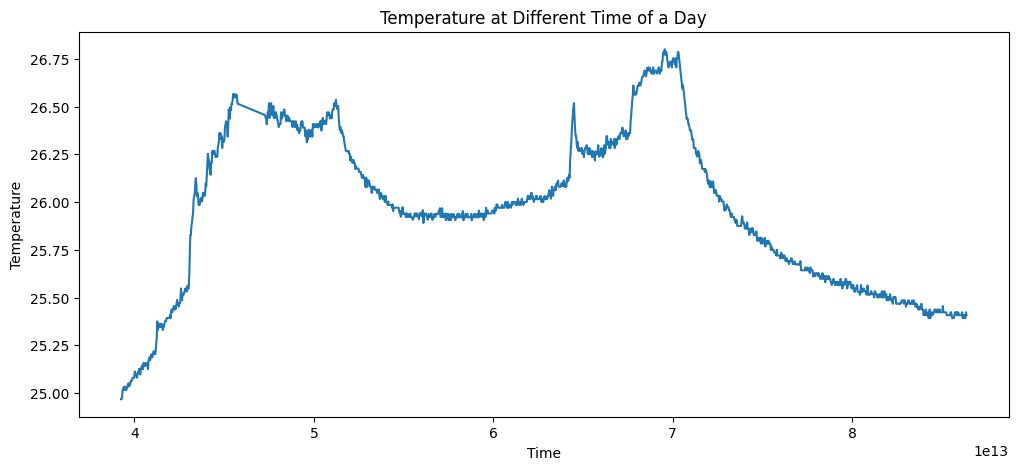

In [100]:
plt.figure( figsize = (12, 5)) 
sns.lineplot(x = 'Time', y = 'Mean of Temperature', data = datedata) 
plt.xlabel('Time')   
plt.ylabel('Temperature')
plt.title('Temperature at Different Time of a Day')
plt.show()

In [101]:
train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

In [102]:
features = train_df.columns.drop('Room_Occupancy_Count')
X_train = train_df[features].values
y_train = train_df['Room_Occupancy_Count'].values
X_test = test_df[features].values
y_test = test_df['Room_Occupancy_Count'].values
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is : ", y_test.shape)

X_train shape is :  (8096, 27)
X_test shape  is :  (2024, 27)
y_train shape is :  (8096,)
y_test shape is :  (2024,)


In [103]:
classes = np.unique(y_train)
prior_probabilities = {cls: np.mean(y_train == cls) for cls in classes}

In [104]:
df['Hour'] = df['Date_Time'].dt.hour
df['DayOfWeek'] = df['Date_Time'].dt.dayofweek

In [105]:
df.drop(['Date_Time', 'Date', 'Time'], axis=1, inplace=True)
features = df.columns.drop('Room_Occupancy_Count')  # Assuming 'Room_Occupancy_Count' is the target

train_df = df.sample(frac=0.8, random_state=1)
test_df = df.drop(train_df.index)

X_train = train_df[features].values
y_train = train_df['Room_Occupancy_Count'].values
X_test = test_df[features].values
y_test = test_df['Room_Occupancy_Count'].values

In [118]:
features = train_df.columns.drop('Room_Occupancy_Count')
y_pred = predict(X_test, mean_variance, prior_probabilities, features)

/var/folders/ss/mk5yhtwj41sf_tlkfkr4n5lh0000gn/T/ipykernel_33518/2239157096.py:46: RuntimeWarning: divide by zero encountered in log
  class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))


In [119]:
mean_variance = {}
for cls in classes:
    features_data = X_train[y_train == cls]
    mean_variance[cls] = {
        "mean": np.mean(features_data, axis=0),
        "variance": np.var(features_data, axis=0)
    }

def gaussian_pdf(x, mean, variance):
    """
    Calculate the Gaussian probability density function.

    Parameters:
        x (float): The point for calculating the probability.
        mean (float): The mean of the Gaussian distribution.
        variance (float): The variance of the Gaussian distribution.

    Returns:
        float: The probability density value.
    """
    coefficient = 1 / np.sqrt(2 * np.pi * variance)
    exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
    return coefficient * exponent

def predict(X, mean_variance, prior_probabilities, features):
    """
    Predict the class labels for the given inputs.

    Parameters:
        X (ndarray): Input features.
        mean_variance (dict): Precomputed mean and variance for each class.
        prior_probabilities (dict): Prior probabilities of each class.
        features (list): List of feature names.

    Returns:
        list: Predicted class labels.
    """
    predictions = []
    for x in X:
        class_probs = {}
        for cls in classes:
            class_probs[cls] = np.log(prior_probabilities[cls])
            for i, feature in enumerate(features):
                mean = mean_variance[cls]["mean"][i]
                variance = mean_variance[cls]["variance"][i]
                class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))
        predictions.append(max(class_probs, key=class_probs.get))
    return predictions

In [121]:
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [122]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for i, label in enumerate(labels):
        for j, pred_label in enumerate(labels):
            matrix[i, j] = np.sum((y_true == label) & (y_pred == pred_label))
    return matrix

def precision_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    return np.nanmean(precision)

def recall_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    return np.nanmean(recall)

def f1_score(y_true, y_pred, labels):
    precision = precision_score(y_true, y_pred, labels)
    recall = recall_score(y_true, y_pred, labels)
    return 2 * (precision * recall) / (precision + recall)

In [123]:
labels = np.unique(y_train)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, labels)
recall = recall_score(y_test, y_pred, labels)
f1 = f1_score(y_test, y_pred, labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.83
Recall: 0.88
F1 Score: 0.86


In [124]:
def auc(tpr, fpr):
    sorted_indices = np.argsort(fpr)
    sorted_fpr = np.array(fpr)[sorted_indices]
    sorted_tpr = np.array(tpr)[sorted_indices]
    return np.trapz(sorted_tpr, sorted_fpr)

In [125]:
def predict_probabilities(X):
    probabilities = []
    for x in X:
        class_probs = {}
        total_prob = 0
        for cls in classes:
            class_probs[cls] = np.log(prior_probabilities[cls])
            for i in range(len(features)):
                mean = mean_variance[cls]["mean"][i]
                variance = mean_variance[cls]["variance"][i]
                class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))
            total_prob += np.exp(class_probs[cls])
        for cls in classes:
            class_probs[cls] = np.exp(class_probs[cls]) / total_prob
        probabilities.append([class_probs[cls] for cls in sorted(classes)])
    return np.array(probabilities)

In [126]:
def calculate_roc_curve(y_true, y_prob):
    tpr = []
    fpr = []
    thresholds = np.linspace(0, 1, 100)  
    for threshold in thresholds:
        y_pred = y_prob >= threshold
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        tpr.append(tp / (tp + fn) if tp + fn else 0)
        fpr.append(fp / (fp + tn) if fp + tn else 0)
    return fpr, tpr

y_prob = predict_probabilities(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls] = calculate_roc_curve(y_test == cls, y_prob[:, i])
    roc_auc[cls] = auc(tpr[cls], fpr[cls])

/var/folders/ss/mk5yhtwj41sf_tlkfkr4n5lh0000gn/T/ipykernel_33518/3923306888.py:11: RuntimeWarning: divide by zero encountered in log
  class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))


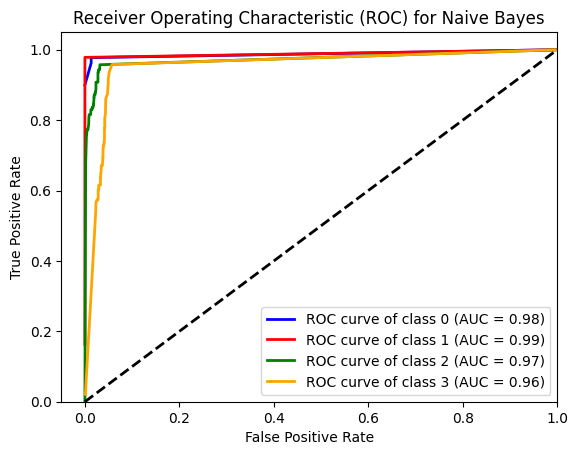

In [127]:
colors = ['blue', 'red', 'green', 'orange']
plt.figure()
for cls, color in zip(classes, colors):
    plt.plot(fpr[cls], tpr[cls], color=color, lw=2, label=f'ROC curve of class {cls} (AUC = {roc_auc[cls]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Scikit vs Manual 

In [62]:
def manual_naive_bayes(X_train, y_train):
    classes = np.unique(y_train)
    mean_variance = {}
    for cls in classes:
        features_data = X_train[y_train == cls]
        mean_variance[cls] = {
            "mean": np.mean(features_data, axis=0),
            "variance": np.var(features_data, axis=0)
        }
        print(f"Class {cls} - Mean: {mean_variance[cls]['mean']}, Variance: {mean_variance[cls]['variance']}")
    return mean_variance

mean_variance_manual = manual_naive_bayes(X_train, y_train)


Class 0 - Mean: [ 1.15815181e+01  4.06162386e+02  5.64849164e+00  1.11648716e+01
  2.53240999e+01  1.16290274e+01  3.99057751e+00  2.53369681e+01
  2.53695578e+01  2.49297796e+01  2.56600942e+01  2.67370821e+00
  3.03784195e+00  1.32878419e+01  9.17598784e+00  4.99523176e-03
  7.72492401e-02  5.28875380e-02  6.40927052e-02  7.96595745e-02
  4.04737842e+02 -3.06899112e-01  2.88753799e-03  1.36778116e-03
  1.06290274e+01  2.99057751e+00], Variance: [1.65506633e+03 1.97535473e+04 1.04669667e+02 7.73983282e+01
 7.97110012e-02 5.89555404e+01 4.70112702e+00 5.77894549e-02
 1.07221795e-01 1.09079936e-01 9.44922708e-02 2.66505245e+01
 3.48765315e+01 5.84608940e+02 2.80815229e+02 2.56944683e-03
 6.07361873e-03 4.94397215e-03 6.71824976e-03 9.83349156e-04
 1.88740156e+04 6.87968407e-01 2.87920012e-03 1.36591033e-03
 5.89555404e+01 4.70112702e+00]
Class 1 - Mean: [1.87725016e+01 4.72175978e+02 2.29939455e+01 5.78064735e+01
 2.57720391e+01 1.49329609e+01 5.56983240e+00 2.57708659e+01
 2.58734916e+

In [64]:
from sklearn.naive_bayes import GaussianNB

def sklearn_naive_bayes(X_train, y_train):
    model = GaussianNB()
    model.fit(X_train, y_train)
    print("Class Prior:", model.class_prior_)
    for i, cls in enumerate(model.classes_):
        print(f"Class {cls} - Mean: {model.theta_[i]}, Variance: {model.var_[i]}")
    return model

model = sklearn_naive_bayes(X_train, y_train)


Class Prior: [0.81274704 0.04421937 0.0749753  0.0680583 ]
Class 0 - Mean: [ 1.15815181e+01  4.06162386e+02  5.64849164e+00  1.11648716e+01
  2.53240999e+01  1.16290274e+01  3.99057751e+00  2.53369681e+01
  2.53695578e+01  2.49297796e+01  2.56600942e+01  2.67370821e+00
  3.03784195e+00  1.32878419e+01  9.17598784e+00  4.99523176e-03
  7.72492401e-02  5.28875380e-02  6.40927052e-02  7.96595745e-02
  4.04737842e+02 -3.06899112e-01  2.88753799e-03  1.36778116e-03
  1.06290274e+01  2.99057751e+00], Variance: [1.65506637e+03 1.97535473e+04 1.04669708e+02 7.73983685e+01
 7.97512126e-02 5.89555806e+01 4.70116723e+00 5.78296662e-02
 1.07262007e-01 1.09120148e-01 9.45324821e-02 2.66505648e+01
 3.48765717e+01 5.84608981e+02 2.80815269e+02 2.60965816e-03
 6.11383007e-03 4.98418349e-03 6.75846110e-03 1.02356049e-03
 1.88740157e+04 6.88008618e-01 2.91941145e-03 1.40612166e-03
 5.89555806e+01 4.70116723e+00]
Class 1 - Mean: [1.87725016e+01 4.72175978e+02 2.29939455e+01 5.78064735e+01
 2.57720391e+01

In [115]:
df.columns

Index(['MV CO2', 'MA CO2', 'Mean of Sound', 'Mean of Light',
       'Mean of Temperature', 'Hour of Day', 'Day of Week', 'S1_Temp',
       'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light',
       'S4_Light', 'Footsteps Sound', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'Hour', 'DayOfWeek'],
      dtype='object')

In [132]:
features = train_df.columns.drop('Room_Occupancy_Count')

## Prior probabilities P(y) 

In [133]:
prior_probabilities = {cls: np.mean(y_train == cls) for cls in classes}

## Likelihoods

In [134]:
mean_variance = {}
for cls in classes:
    features_data = X_train[y_train == cls]
    mean_variance[cls] = {
        "mean": np.mean(features_data, axis=0),
        "variance": np.var(features_data, axis=0)
    }


## Posterior Probability

In [135]:
def predict(X, mean_variance, prior_probabilities, features):
    predictions = []
    for x in X:
        class_probs = {}
        for cls in classes:
            class_probs[cls] = np.log(prior_probabilities[cls])
            for i, feature in enumerate(features):
                mean = mean_variance[cls]["mean"][i]
                variance = mean_variance[cls]["variance"][i]
                class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))
        predictions.append(max(class_probs, key=class_probs.get))
    return predictions

In [136]:
y_pred = predict(X_test, mean_variance, prior_probabilities, features)

/var/folders/ss/mk5yhtwj41sf_tlkfkr4n5lh0000gn/T/ipykernel_33518/3126179150.py:10: RuntimeWarning: divide by zero encountered in log
  class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))


# Evaluation 

In [137]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [138]:
def confusion_matrix(y_true, y_pred, labels):
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    for i, label in enumerate(labels):
        for j, pred_label in enumerate(labels):
            matrix[i, j] = np.sum((y_true == label) & (y_pred == pred_label))
    return matrix

def precision_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    return np.nanmean(precision)

def recall_score(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    return np.nanmean(recall)

def f1_score(y_true, y_pred, labels):
    precision = precision_score(y_true, y_pred, labels)
    recall = recall_score(y_true, y_pred, labels)
    return 2 * (precision * recall) / (precision + recall)

labels = np.unique(y_train)
precision = precision_score(y_test, y_pred, labels)
recall = recall_score(y_test, y_pred, labels)
f1 = f1_score(y_test, y_pred, labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.83
Recall: 0.88
F1 Score: 0.86


## ROC Curve and AUC

In [140]:
def calculate_roc_curve(y_true, y_prob):
    tpr = []
    fpr = []
    thresholds = np.linspace(0, 1, 100)  
    for threshold in thresholds:
        y_pred = y_prob >= threshold
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        tpr.append(tp / (tp + fn) if tp + fn else 0)
        fpr.append(fp / (fp + tn) if fp + tn else 0)
    return fpr, tpr

y_prob = predict_probabilities(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls] = calculate_roc_curve(y_test == cls, y_prob[:, i])
    roc_auc[cls] = auc(tpr[cls], fpr[cls])

/var/folders/ss/mk5yhtwj41sf_tlkfkr4n5lh0000gn/T/ipykernel_33518/3923306888.py:11: RuntimeWarning: divide by zero encountered in log
  class_probs[cls] += np.log(gaussian_pdf(x[i], mean, variance))


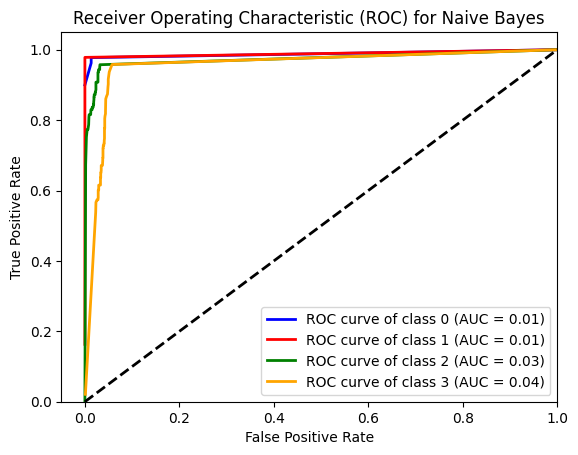

In [141]:
colors = ['blue', 'red', 'green', 'orange']
plt.figure()
for cls, color in zip(classes, colors):
    plt.plot(fpr[cls], tpr[cls], color=color, lw=2, label=f'ROC curve of class {cls} (AUC = {roc_auc[cls]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()